## Проект по теме "Прогнозирование наличия сердечно-сосудистых заболеваний на основе характеристик пациентов"

Датасет представляет собой .csv файл, содержащий следующие поля:

* id: идентификатор для каждого человека в наборе данных;
* age: возраст человека (в днях);
* gender: пол (1 для женщин, 2 для мужчин);
* height: рост в сантиметрах;
* weight: вес в килограммах;
* ap_hi: систолическое артериальное давление (измеряется в мм рт.ст.);
* ap_lo: диастолическое артериальное давление (измеряется в мм рт.ст.);
* cholesterol: уровень холестерина (1 – в норме, 2 – выше нормы, 3 –
значительно выше нормы);
* gluc: уровень глюкозы (1 – в норме, 2 – выше нормы, 3 – значительно выше
нормы);
* smoke: курит ли человек (0 – нет, 1 – да);
* alco: употребляет ли человек алкоголь (0 – нет, 1 – да);
* active: является ли человек физически активным (0 – нет, 1 – да);
* cardio: наличие сердечно-сосудистых заболеваний (0 – нет, 1 – да).

Задачей является построить модель, предсказывающую наличие сердечно-сосудистых заболеваний.
Вам необходимо реализовать все дальнейшие шаги, обучить модель и оценить её качество.

## Задание 1: загрузка файла и проверка пропущенных значений (5 баллов)

Откройте данные и изучите их: есть ли пропущенные значения? Прокомментируйте результат. Если пропущенные значения есть - удалите строки с ними.

In [314]:
import pandas as pd

In [315]:
# Открываем данные
df = pd.read_csv('data/cvd.xls - cvd.xls.csv')
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [316]:
# Проверяем на пропущенные значения
df.isna().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [317]:
# В данных нет пропущенных значений.

In [318]:
# Ещё на этом этапе возникли вопросы:
# 1) Ничего не сказано про предобработку признаков. Больше всего интересует столбец 'age' в днях, нужно ли переводить в года?
# 2) Ничего не сказано про столбец 'id'. По идее он неинформативный и будет привносить шум. Нужно ли удалять?
# 3) Ничего не сказано касательно дубликатов. Даже пункта на их проверку нет.
# Не знаю, можно ли отступать от поставленной задачи.
# Надеюсь это не будет ошибкой.

In [319]:
# Проверяем на дубликаты
df.duplicated().sum()

0

In [320]:
# Избавляемся от столбца 'id'
df = df.drop('id',axis =1)
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [321]:
# Предобработаем признак 'age'
df['age'] = round(df['age'] / 365)
df['age']

0        50.0
1        55.0
2        52.0
3        48.0
4        48.0
         ... 
69995    53.0
69996    62.0
69997    52.0
69998    61.0
69999    56.0
Name: age, Length: 70000, dtype: float64

## Задание 2: проверка данных на мультиколлинеарность (15 баллов)

**2.1** Данные обязательно необходимо проверить на мультиколлинеарность: линейную взаимосвязь между признаками. Сначала проверим наличие чистой мультиколлинеарности. Для того, чтобы её идентифицировать - для начала посчитайте ранг для матрицы корреляций и ее определитель. Какой вывод можно сделать?

In [322]:
# Вычисляем матрицу корреляций
corr_matrix = df.corr()
corr_matrix.shape

(12, 12)

In [323]:
import numpy as np

In [324]:
print('Ранг:', np.linalg.matrix_rank(corr_matrix))
print('Определитель:', np.linalg.det(corr_matrix))

Ранг: 12
Определитель: 0.34687753867660565


In [325]:
# Ранг нашей матрицы корреляций максимальный и говорит, что наши столбцы линейно независимы.
# Определитель матрицы корреляций не близок к 0, следовательно она не вырожденная.
# Это также говорит о том, что строки и столбцы являются линейно независимыми и не выражаются друг через друга.

**2.2** Теперь проверьте мультиколлинеарность с помощью матрицы корреляций. Какие выводы можно сделать?

In [326]:
corr_matrix

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
age,1.000000,-0.023017,-0.081456,0.053661,0.020793,0.017754,0.154386,0.098596,-0.047884,-0.029918,-0.009819,0.237749
gender,-0.023017,1.000000,0.499033,0.155406,0.006005,0.015254,-0.035821,-0.020491,0.338135,0.170966,0.005866,0.008109
height,-0.081456,0.499033,1.000000,0.290968,0.005488,0.006150,-0.050226,-0.018595,0.187989,0.094419,-0.006570,-0.010821
weight,0.053661,0.155406,0.290968,1.000000,0.030702,0.043710,0.141768,0.106857,0.067780,0.067113,-0.016867,0.181660
ap_hi,0.020793,0.006005,0.005488,0.030702,1.000000,0.016086,0.023778,0.011841,-0.000922,0.001408,-0.000033,0.054475
ap_lo,0.017754,0.015254,0.006150,0.043710,0.016086,1.000000,0.024019,0.010806,0.005186,0.010601,0.004780,0.065719
cholesterol,0.154386,-0.035821,-0.050226,0.141768,0.023778,0.024019,1.000000,0.451578,0.010354,0.035760,0.009911,0.221147
gluc,0.098596,-0.020491,-0.018595,0.106857,0.011841,0.010806,0.451578,1.000000,-0.004756,0.011246,-0.006770,0.089307
smoke,-0.047884,0.338135,0.187989,0.067780,-0.000922,0.005186,0.010354,-0.004756,1.000000,0.340094,0.025858,-0.015486
alco,-0.029918,0.170966,0.094419,0.067113,0.001408,0.010601,0.035760,0.011246,0.340094,1.000000,0.025476,-0.007330


In [327]:
import seaborn as sns

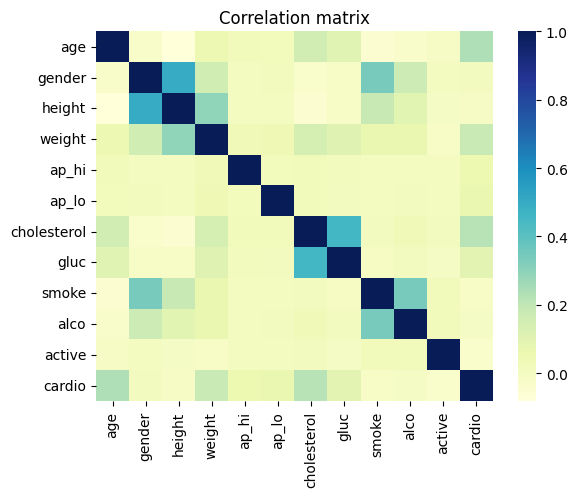

In [328]:
heatmap = sns.heatmap(data=df.corr(), cmap='YlGnBu')
heatmap.set_title('Correlation matrix');

In [329]:
# Т.к. наши признаки линейно независимы, то у нас не получится выразить один признак через остальные.
# Следовательно, в данных мало "мусора", и низкий уровень мультиколлинеарности.

## Задание 3. Стандартизация (15 баллов)

Разделите данные на два массива: в переменную **Х** запишите массив признаков, а в переменную **y** - целевую переменную (cardio). Стандартизируйте массив признаков без использования готовых функций для стандартизации.

In [330]:
X = df.drop('cardio',axis =1)  
y = df['cardio']

In [331]:
# Стандартизируем векторы в столбцах матрицы Х, без использования готовых функций:
# 1) Центрирование вектора — это операция приведения среднего к 0
# 2) Нормирование вектора — это операция приведения диапазона вектора к масштабу от -1 до 1 путём деления центрированного вектора на его длину
X_cent = X - X.mean()
X_st = X_cent/np.linalg.norm(X_cent, axis=0)
X_st

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,-0.001865,0.005156,0.001676,-0.003205,-0.000462,-0.000334,-0.002038,-0.001496,-0.001175,-0.000901,0.001868
1,0.000928,-0.002771,-0.003848,0.002834,0.000274,-0.000133,0.009074,-0.001496,-0.001175,-0.000901,0.001868
2,-0.000748,-0.002771,0.000295,-0.002680,0.000029,-0.000534,0.009074,-0.001496,-0.001175,-0.000901,-0.007649
3,-0.002983,0.005156,0.002136,0.002046,0.000520,0.000068,-0.002038,-0.001496,-0.001175,-0.000901,0.001868
4,-0.002983,-0.002771,-0.003848,-0.004780,-0.000707,-0.000735,-0.002038,-0.001496,-0.001175,-0.000901,-0.007649
...,...,...,...,...,...,...,...,...,...,...,...
69995,-0.000189,0.005156,0.001676,0.000471,-0.000216,-0.000334,-0.002038,-0.001496,0.012158,-0.000901,0.001868
69996,0.004839,-0.002771,-0.002928,0.013599,0.000274,-0.000133,0.003518,0.005109,-0.001175,-0.000901,0.001868
69997,-0.000748,0.005156,0.008582,0.008085,0.001256,-0.000133,0.009074,-0.001496,-0.001175,0.015855,-0.007649
69998,0.004280,-0.002771,-0.000626,-0.000579,0.000152,-0.000334,-0.002038,0.005109,-0.001175,-0.000901,-0.007649


Вычислите длину всех векторов - признаков. Прокомментируйте результат.

In [332]:
# Длины векторов
print("Длина вектора 'age':", np.linalg.norm(X_st['age']))
print("Длина вектора 'gender':", np.linalg.norm(X_st['gender']))
print("Длина вектора 'height':", np.linalg.norm(X_st['height']))
print("Длина вектора 'weight':", np.linalg.norm(X_st['weight']))
print("Длина вектора 'ap_hi':", np.linalg.norm(X_st['ap_hi']))
print("Длина вектора 'ap_lo':", np.linalg.norm(X_st['ap_lo']))
print("Длина вектора 'cholesterol':", np.linalg.norm(X_st['cholesterol']))
print("Длина вектора 'gluc':", np.linalg.norm(X_st['gluc']))
print("Длина вектора 'smoke':", np.linalg.norm(X_st['smoke']))
print("Длина вектора 'alco':", np.linalg.norm(X_st['alco']))
print("Длина вектора 'active':", np.linalg.norm(X_st['active']))

Длина вектора 'age': 0.9999999999999997
Длина вектора 'gender': 1.0000000000000007
Длина вектора 'height': 0.9999999999999999
Длина вектора 'weight': 0.9999999999999994
Длина вектора 'ap_hi': 1.0000000000000007
Длина вектора 'ap_lo': 1.0000000000000007
Длина вектора 'cholesterol': 1.0000000000000009
Длина вектора 'gluc': 1.0000000000000033
Длина вектора 'smoke': 0.9999999999999966
Длина вектора 'alco': 0.9999999999999982
Длина вектора 'active': 1.0


In [333]:
# После стандартизации векторы (признаки) имеют одинаковые средние значения и стандартные отклонения.
# В результате стандартизации вектора всегда получается новый вектор, длина которого равна 1.
# Если округлить получившиеся значения, то именно такой результат мы и получим.

## Задание 4. Решение задачи классификации. (20 баллов)

**4.1** Теперь приступим непосредственно к решению задачи классификации. Обучите наивный байесовский классификатор. Предварительно выберите один из его видов: поясните свой выбор.

In [334]:
from sklearn.model_selection import train_test_split

In [335]:
# Делим выборку на тренировочную и тестовую
X_train, X_test, y_train, y_test = train_test_split(X_st, y, test_size=0.2, random_state=42)

In [336]:
from sklearn.naive_bayes import GaussianNB

In [337]:
# Создание модели гауссовского наивного байесовского классификатора
model_nb = GaussianNB()
model_nb.fit(X_train, y_train)

GaussianNB()

In [338]:
# Мною был выбран GaussianNB — самый простой вариант, т.к. он работает с непрерывными признаками.
# MultinomialNB  — работает с категориальными признаками, текстами и несбалансированными выборками. Нам не подходит.
# ComplementNB — улучшенная версия MultinomialNB, не выбран по той же причине.
# BernoulliNB — версия для работы с бинарными признаками. После стандартизации признаков нам это не подходит.
# CategoricalNB — работает с категориальными признаками, предполагает кодировку данных через OrdinalEncoder. А мы этого не делали.

**4.2** Оцените полученное качество и проинтерпретируйте полученный результат. Не забудьте разделить выборку на обучающую и тестовую части.

In [339]:
# Делаем предсказание
nb_y_train_pred = model_nb.predict(X_train)
nb_y_test_pred = model_nb.predict(X_test)

In [340]:
from sklearn import metrics

In [341]:
# Считаем метрику accuracy на обучающей и тестовой выборках
print('GaussianNB Train accuracy: {:.3f}'.format(metrics.accuracy_score(y_train, nb_y_train_pred)))
print('GaussianNB Test accuracy: {:.3f}'.format(metrics.accuracy_score(y_test, nb_y_test_pred)))

GaussianNB Train accuracy: 0.596
GaussianNB Test accuracy: 0.594


In [342]:
y_test.value_counts(normalize=True)

cardio
1    0.500857
0    0.499143
Name: proportion, dtype: float64

In [343]:
# Чтобы понять насколько хороший/плохой результат мы получили, посчитаем baseline accuracy для модели, которая всегда говорит '0' (заболевания нет)
# Он будет равен доле класса '0' -> 0.499
# Следовательно, наша модель чуть лучше, чем baseline accuracy

## Задание 5: Решающее дерево (25 баллов)

Теперь решите задачу классификации с помощью обучающего дерева.

**5.1** Обучите дерево, не задавая никакие гиперпараметры. Выведите получившиеся гиперпараметры. Какое получилось качество? Сравните результат с предыдущей моделью.

In [344]:
from sklearn.tree import DecisionTreeClassifier

In [345]:
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train, y_train)

print('Depth: {}'.format(model_dt.get_depth()))
print('Count of leaves: {}'.format(model_dt.get_n_leaves()))

Depth: 44
Count of leaves: 18517


In [346]:
# Делаем предсказание
dt_y_train_pred = model_dt.predict(X_train)
dt_y_test_pred = model_dt.predict(X_test)

In [347]:
# Считаем метрику accuracy на обучающей и тестовой выборках
print('DecisionTreeClassifier Train accuracy: {:.3f}'.format(metrics.accuracy_score(y_train, dt_y_train_pred)))
print('DecisionTreeClassifier Test accuracy: {:.3f}'.format(metrics.accuracy_score(y_test, dt_y_test_pred)))

DecisionTreeClassifier Train accuracy: 0.976
DecisionTreeClassifier Test accuracy: 0.631


In [348]:
# Даже не настраивая параметры, мы получили accuracy лучше, чем у модели GaussianNB.
# Но модель явно получилась переобученной.

**5.2** Подберите оптимальные гиперпараметры с помощью перебора по сетке. Обучите дерево с оптимальными гиперпараметрами. Изменилось ли качество?

In [349]:
from sklearn import model_selection
from sklearn import tree

In [350]:
# Задаем сетку параметров
param_grid = {
    'criterion': ['gini', 'entropy'], #критерий информативности
    'max_depth': [4, 5, 6, 7, 8, 9, 10], #максимальная глубина дерева
    'min_samples_split': [3, 4, 5, 10] #минимальное количество объектов, необходимое для сплита
}

# Задаем метод кросс-валидации
cv = model_selection.StratifiedKFold(n_splits=5)

# Инициализируем поиск на сетке и обучаем его
gs_tree = model_selection.GridSearchCV(
    estimator=tree.DecisionTreeClassifier(random_state=42), #модель
    param_grid=param_grid, #сетка параметров
    scoring='accuracy', #метрика
    cv=cv, #кросс-валидатор
    n_jobs=-1 #используем все мощности процессора
)
gs_tree.fit(X_train, y_train)
print(gs_tree.best_params_)

# Определяем наилучшую модель
best_tree = gs_tree.best_estimator_

{'criterion': 'gini', 'max_depth': 6, 'min_samples_split': 3}


In [351]:
# Делаем предсказание
best_dt_y_train_pred = best_tree.predict(X_train)
best_dt_y_test_pred = best_tree.predict(X_test)

In [352]:
# Считаем метрику accuracy на обучающей и тестовой выборках
print('Best Tree Train accuracy: {:.3f}'.format(metrics.accuracy_score(y_train, best_dt_y_train_pred)))
print('Best Tree Test accuracy: {:.3f}'.format(metrics.accuracy_score(y_test, best_dt_y_test_pred)))

Best Tree Train accuracy: 0.733
Best Tree Test accuracy: 0.733


In [353]:
# Итоговая модель (оцениваем по test выборке) получилось ещё лучше, чем на рандомных параметрах, что заканомерно.

**5.3** Выведите важность признаков. Какие три признака самые важные? Прокомментируйте результат.

In [354]:
import matplotlib.pyplot as plt

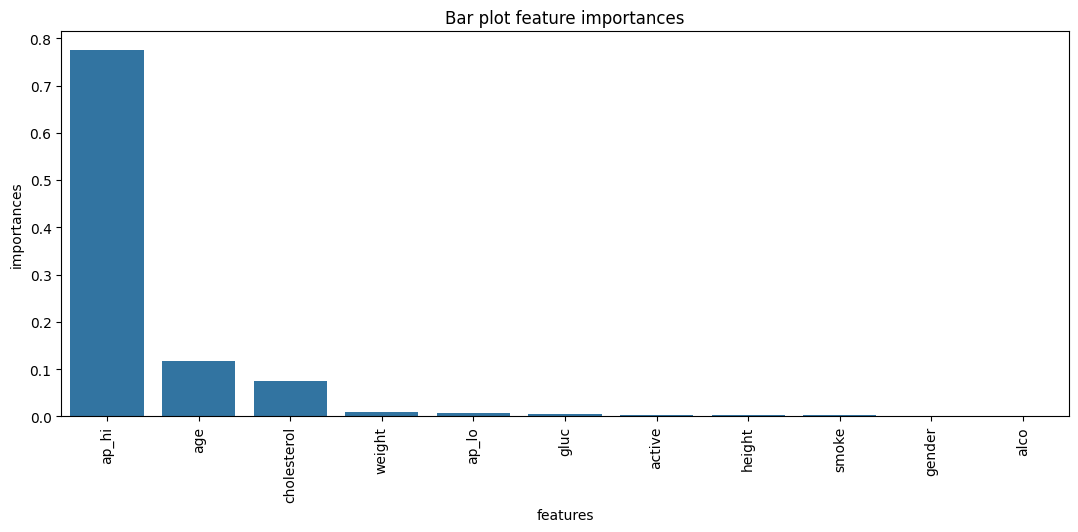

In [355]:
fig, ax = plt.subplots(figsize=(13, 5)) #фигура + координатная плоскость
features = X.columns #признаки
feature_importances = best_tree.feature_importances_ #важность признаков

# Создаём DataFrame, содержащий информацию о важности признаков
importances_data = pd.DataFrame({'features': features, 'importances': feature_importances})
importances_data = importances_data.sort_values(by='importances', ascending=False)

# Строим столбчатую диаграмму
sns.barplot(data=importances_data, x='features', y='importances', ax=ax);

# Добавляем подпись к графику и поворот меток на оси абсцисс
ax.set_title('Bar plot feature importances')
ax.xaxis.set_tick_params(rotation=90)

In [356]:
# Три наиболее важных признака: 'api_hi', 'age', 'cholesterol'.
# Из них явный лидер 'api_hi'.
# У остальных признаков значение меньше 0.05.

## Задание 6: Случайный лес и градиентный бустинг (20 баллов)

Осталось применить ансамблевые методы!

**6.1** Используйте случайный лес: без настройки и с подробом гиперпараметров по сетке. Какое качество получается в ситуации оптимальных гиперпараметров? Какие признаки самые важные? Сравнение результат с простым решающим деревом.

In [361]:
from sklearn.ensemble import RandomForestClassifier

In [362]:
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)

RandomForestClassifier()

In [363]:
# Делаем предсказание
rf_y_train_pred = model_rf.predict(X_train)
rf_y_test_pred = model_rf.predict(X_test)

In [365]:
# Считаем метрику accuracy на обучающей и тестовой выборках
print('RandomForestClassifier Train accuracy: {:.3f}'.format(metrics.accuracy_score(y_train, rf_y_train_pred)))
print('RandomForestClassifier Test accuracy: {:.3f}'.format(metrics.accuracy_score(y_test, rf_y_test_pred)))

RandomForestClassifier Train accuracy: 0.976
RandomForestClassifier Test accuracy: 0.706


In [366]:
# Инициализируем поиск на сетке и обучаем его
gs_forest = model_selection.GridSearchCV(
    estimator=RandomForestClassifier(random_state=42), #модель
    param_grid=param_grid, #сетка параметров
    scoring='accuracy', #метрика
    cv=cv, #кросс-валидатор
    n_jobs=-1 #используем все мощности процессора
)
gs_forest.fit(X_train, y_train)
print(gs_forest.best_params_)

# Определяем наилучшую модель
best_forest = gs_forest.best_estimator_

{'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 10}


In [367]:
# Делаем предсказание
best_forest_y_train_pred = best_forest.predict(X_train)
best_forest_y_test_pred = best_forest.predict(X_test)

In [368]:
# Считаем метрику accuracy на обучающей и тестовой выборках
print('Best Forest Train accuracy: {:.3f}'.format(metrics.accuracy_score(y_train, best_forest_y_train_pred)))
print('Best Forest Test accuracy: {:.3f}'.format(metrics.accuracy_score(y_test, best_forest_y_test_pred)))

Best Forest Train accuracy: 0.750
Best Forest Test accuracy: 0.741


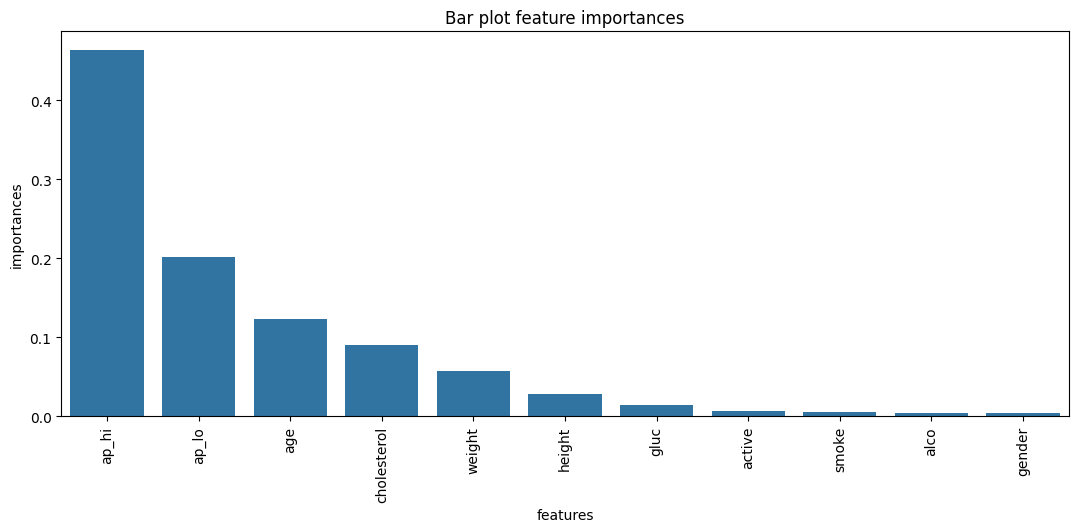

In [369]:
fig, ax = plt.subplots(figsize=(13, 5)) #фигура + координатная плоскость
features = X.columns #признаки
feature_importances = best_forest.feature_importances_ #важность признаков

# Создаём DataFrame, содержащий информацию о важности признаков
importances_data = pd.DataFrame({'features': features, 'importances': feature_importances})
importances_data = importances_data.sort_values(by='importances', ascending=False)

# Строим столбчатую диаграмму
sns.barplot(data=importances_data, x='features', y='importances', ax=ax);

# Добавляем подпись к графику и поворот меток на оси абсцисс
ax.set_title('Bar plot feature importances')
ax.xaxis.set_tick_params(rotation=90)

In [370]:
# В ситуации оптимальных параметров получилось ещё немного улучшить метрику accuracy, в сравнении с Best DecisionTreeClassifier, который выдал нам 0.733 для test выборки.
# Также изменилась важность признаков:
# Наиболе важным признаком остаётся 'ap_hi', далее идут 'ap_lo' и 'age'.
# Признак 'cholesterol' стал 4 не доходя до значения в 0.1.

**6.2** Аналогичные операции реализуйте для градиентного бустинга. Попробуйте хотя бы две разных реализации градиентного бустинга. Сравните итоговое качество со случайным деревом.

In [371]:
from sklearn.ensemble import GradientBoostingClassifier

In [377]:
model_gb = GradientBoostingClassifier()
model_gb.fit(X_train, y_train)

GradientBoostingClassifier()

In [378]:
# Делаем предсказание
gb_y_train_pred = model_gb.predict(X_train)
gb_y_test_pred = model_gb.predict(X_test)

In [379]:
# Считаем метрику accuracy на обучающей и тестовой выборках
print('GradientBoostingClassifier Train accuracy: {:.3f}'.format(metrics.accuracy_score(y_train, gb_y_train_pred)))
print('GradientBoostingClassifier Test accuracy: {:.3f}'.format(metrics.accuracy_score(y_test, gb_y_test_pred)))

GradientBoostingClassifier Train accuracy: 0.738
GradientBoostingClassifier Test accuracy: 0.739


In [373]:
params = {"n_estimators":2**np.arange(8), "learning_rate":0.1**np.arange(3)}
model_for_gs = GradientBoostingClassifier()

gs_for_gb = model_selection.GridSearchCV(   
                  model_for_gs, 
                  params, 
                  cv=3, 
                  scoring='accuracy',
                  verbose=5)
 
gs_for_gb.fit(X_train, y_train)
print(gs_for_gb.best_params_)

# Определяем наилучшую модель
best_gb = gs_for_gb.best_estimator_

Fitting 3 folds for each of 24 candidates, totalling 72 fits
[CV 1/3] END .learning_rate=1.0, n_estimators=1;, score=0.729 total time=   0.0s
[CV 2/3] END .learning_rate=1.0, n_estimators=1;, score=0.723 total time=   0.0s
[CV 3/3] END .learning_rate=1.0, n_estimators=1;, score=0.722 total time=   0.0s
[CV 1/3] END .learning_rate=1.0, n_estimators=2;, score=0.732 total time=   0.0s
[CV 2/3] END .learning_rate=1.0, n_estimators=2;, score=0.730 total time=   0.0s
[CV 3/3] END .learning_rate=1.0, n_estimators=2;, score=0.726 total time=   0.0s
[CV 1/3] END .learning_rate=1.0, n_estimators=4;, score=0.735 total time=   0.0s
[CV 2/3] END .learning_rate=1.0, n_estimators=4;, score=0.730 total time=   0.0s
[CV 3/3] END .learning_rate=1.0, n_estimators=4;, score=0.729 total time=   0.0s
[CV 1/3] END .learning_rate=1.0, n_estimators=8;, score=0.736 total time=   0.1s
[CV 2/3] END .learning_rate=1.0, n_estimators=8;, score=0.731 total time=   0.1s
[CV 3/3] END .learning_rate=1.0, n_estimators=8;

In [374]:
# Делаем предсказание
best_gb_y_train_pred = best_gb.predict(X_train)
best_gb_y_test_pred = best_gb.predict(X_test)

In [376]:
# Считаем метрику accuracy на обучающей и тестовой выборках
print('Best GradientBoostingClassifier Train accuracy: {:.3f}'.format(metrics.accuracy_score(y_train, best_gb_y_train_pred)))
print('Best GradientBoostingClassifier Test accuracy: {:.3f}'.format(metrics.accuracy_score(y_test, best_gb_y_test_pred)))

Best GradientBoostingClassifier Train accuracy: 0.738
Best GradientBoostingClassifier Test accuracy: 0.740


In [381]:
from xgboost import XGBClassifier

In [382]:
model_xgb = XGBClassifier()
model_xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [383]:
# Делаем предсказание
xgb_y_train_pred = model_xgb.predict(X_train)
xgb_y_test_pred = model_xgb.predict(X_test)

In [384]:
# Считаем метрику accuracy на обучающей и тестовой выборках
print('XGBClassifier Train accuracy: {:.3f}'.format(metrics.accuracy_score(y_train, xgb_y_train_pred)))
print('XGBClassifier Test accuracy: {:.3f}'.format(metrics.accuracy_score(y_test, xgb_y_test_pred)))

XGBClassifier Train accuracy: 0.760
XGBClassifier Test accuracy: 0.737


In [385]:
params = {"n_estimators":2**np.arange(8), "learning_rate":0.1**np.arange(3)}
model_for_gs = XGBClassifier()

gs_for_xgb = model_selection.GridSearchCV(   
                  model_for_gs, 
                  params, 
                  cv=3, 
                  scoring='accuracy',
                  verbose=5)
 
gs_for_xgb.fit(X_train, y_train)
print(gs_for_xgb.best_params_)

# Определяем наилучшую модель
best_xgb = gs_for_xgb.best_estimator_

Fitting 3 folds for each of 24 candidates, totalling 72 fits
[CV 1/3] END .learning_rate=1.0, n_estimators=1;, score=0.730 total time=   0.0s
[CV 2/3] END .learning_rate=1.0, n_estimators=1;, score=0.731 total time=   0.0s
[CV 3/3] END .learning_rate=1.0, n_estimators=1;, score=0.724 total time=   0.0s
[CV 1/3] END .learning_rate=1.0, n_estimators=2;, score=0.733 total time=   0.0s
[CV 2/3] END .learning_rate=1.0, n_estimators=2;, score=0.731 total time=   0.0s
[CV 3/3] END .learning_rate=1.0, n_estimators=2;, score=0.729 total time=   0.0s
[CV 1/3] END .learning_rate=1.0, n_estimators=4;, score=0.732 total time=   0.0s
[CV 2/3] END .learning_rate=1.0, n_estimators=4;, score=0.730 total time=   0.0s
[CV 3/3] END .learning_rate=1.0, n_estimators=4;, score=0.728 total time=   0.0s
[CV 1/3] END .learning_rate=1.0, n_estimators=8;, score=0.732 total time=   0.0s
[CV 2/3] END .learning_rate=1.0, n_estimators=8;, score=0.727 total time=   0.0s
[CV 3/3] END .learning_rate=1.0, n_estimators=8;

In [386]:
# Делаем предсказание
best_xgb_y_train_pred = best_xgb.predict(X_train)
best_xgb_y_test_pred = best_xgb.predict(X_test)

In [387]:
# Считаем метрику accuracy на обучающей и тестовой выборках
print('Best XGBClassifier Train accuracy: {:.3f}'.format(metrics.accuracy_score(y_train, best_xgb_y_train_pred)))
print('Best XGBClassifier Test accuracy: {:.3f}'.format(metrics.accuracy_score(y_test, best_xgb_y_test_pred)))

Best XGBClassifier Train accuracy: 0.750
Best XGBClassifier Test accuracy: 0.738


In [388]:
from catboost import CatBoostClassifier

In [389]:
model_cb = CatBoostClassifier()
model_cb.fit(X_train,y_train)

Learning rate set to 0.057466
0:	learn: 0.6764166	total: 146ms	remaining: 2m 26s
1:	learn: 0.6615512	total: 153ms	remaining: 1m 16s
2:	learn: 0.6482841	total: 159ms	remaining: 53s
3:	learn: 0.6372189	total: 171ms	remaining: 42.5s
4:	learn: 0.6270818	total: 178ms	remaining: 35.4s
5:	learn: 0.6181124	total: 185ms	remaining: 30.6s
6:	learn: 0.6098300	total: 192ms	remaining: 27.2s
7:	learn: 0.6031088	total: 200ms	remaining: 24.8s
8:	learn: 0.5966763	total: 208ms	remaining: 22.9s
9:	learn: 0.5910530	total: 215ms	remaining: 21.3s
10:	learn: 0.5860427	total: 223ms	remaining: 20s
11:	learn: 0.5818488	total: 230ms	remaining: 19s
12:	learn: 0.5780046	total: 237ms	remaining: 18s
13:	learn: 0.5745341	total: 245ms	remaining: 17.3s
14:	learn: 0.5713327	total: 253ms	remaining: 16.6s
15:	learn: 0.5683956	total: 260ms	remaining: 16s
16:	learn: 0.5658981	total: 266ms	remaining: 15.4s
17:	learn: 0.5636024	total: 272ms	remaining: 14.9s
18:	learn: 0.5615301	total: 278ms	remaining: 14.4s
19:	learn: 0.559678

In [390]:
# Делаем предсказание
cb_y_train_pred = model_cb.predict(X_train)
cb_y_test_pred = model_cb.predict(X_test)

In [391]:
# Считаем метрику accuracy на обучающей и тестовой выборках
print('CatBoostClassifier: {:.3f}'.format(metrics.accuracy_score(y_train, cb_y_train_pred)))
print('CatBoostClassifier: {:.3f}'.format(metrics.accuracy_score(y_test, cb_y_test_pred)))

CatBoostClassifier: 0.753
CatBoostClassifier: 0.738


In [392]:
params = {"n_estimators":2**np.arange(8), "learning_rate":0.1**np.arange(3)}
model_for_gs = CatBoostClassifier()

gs_for_cb = model_selection.GridSearchCV(   
                  model_for_gs, 
                  params, 
                  cv=3, 
                  scoring='accuracy',
                  verbose=5)
 
gs_for_cb.fit(X_train, y_train)
print(gs_for_cb.best_params_)

# Определяем наилучшую модель
best_cb = gs_for_cb.best_estimator_

Fitting 3 folds for each of 24 candidates, totalling 72 fits
0:	learn: 0.5607602	total: 3.51ms	remaining: 0us
[CV 1/3] END .learning_rate=1.0, n_estimators=1;, score=0.729 total time=   0.0s
0:	learn: 0.5575256	total: 4.27ms	remaining: 0us
[CV 2/3] END .learning_rate=1.0, n_estimators=1;, score=0.723 total time=   0.0s
0:	learn: 0.5553488	total: 2.64ms	remaining: 0us
[CV 3/3] END .learning_rate=1.0, n_estimators=1;, score=0.724 total time=   0.0s
0:	learn: 0.5607602	total: 2.84ms	remaining: 2.84ms
1:	learn: 0.5489702	total: 5.4ms	remaining: 0us
[CV 1/3] END .learning_rate=1.0, n_estimators=2;, score=0.734 total time=   0.0s
0:	learn: 0.5575256	total: 2.98ms	remaining: 2.98ms
1:	learn: 0.5466255	total: 5.6ms	remaining: 0us
[CV 2/3] END .learning_rate=1.0, n_estimators=2;, score=0.726 total time=   0.0s
0:	learn: 0.5553488	total: 3.66ms	remaining: 3.66ms
1:	learn: 0.5457661	total: 7.33ms	remaining: 0us
[CV 3/3] END .learning_rate=1.0, n_estimators=2;, score=0.725 total time=   0.0s
0:	le

In [393]:
# Делаем предсказание
best_cb_y_train_pred = best_cb.predict(X_train)
best_cb_y_test_pred = best_cb.predict(X_test)

In [394]:
# Считаем метрику accuracy на обучающей и тестовой выборках
print('Best CatBoostClassifier: {:.3f}'.format(metrics.accuracy_score(y_train, best_cb_y_train_pred)))
print('Best CatBoostClassifier: {:.3f}'.format(metrics.accuracy_score(y_test, best_cb_y_test_pred)))

Best CatBoostClassifier: 0.739
Best CatBoostClassifier: 0.740


In [360]:
# Итог:
# GradientBoostingClassifier Test accuracy: 0.739 
# Best GradientBoostingClassifier Test accuracy: 0.740
# XGBClassifier Test accuracy: 0.737
# Best XGBClassifier Test accuracy: 0.738
# CatBoostClassifier: 0.738
# Best CatBoostClassifier: 0.740

# Лидеров среди моделей бустинга 2: GradientBoostingClassifier и CatBoostClassifier.
# Но никто из них не обогнал Best Forest Test accuracy: 0.741.

# Возможно, можно было улучшить сетку подбора парметров для моделей с бустингом, т.к. везде лучшие параметры повторяются {'learning_rate': 0.1, 'n_estimators': 128}.
# Мб я делал что-то не так, очень жду обратную связь.